## Load raw data
We’ll use the CSVs we saved earlier:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

DATA_DIR = Path("../data")

tickers = ["CBA.AX", "WBC.AX"]
dfs = {}

for t in tickers:
    df = pd.read_csv(DATA_DIR / f"{t}_raw.csv", parse_dates=["Date"], index_col="Date")
    dfs[t] = df
    print(f"{t}: {df.shape} rows, {df.columns.tolist()} columns")
    display(df.head(3))


CBA.AX: (3964, 5) rows, ['Open', 'High', 'Low', 'Close', 'Volume'] columns


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,24.820229,25.002163,24.765649,24.956678,992762
2010-01-05,25.038546,25.379671,25.038546,25.334187,3163161
2010-01-06,25.475191,25.561609,25.375128,25.461546,3210425


WBC.AX: (3964, 5) rows, ['Open', 'High', 'Low', 'Close', 'Volume'] columns


,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,10.781366,10.794126,10.738836,10.760101,2765223
2010-01-05,10.887691,10.887691,10.798378,10.849414,4773662
2010-01-06,10.798378,10.840908,10.747342,10.798378,3109106


2) Basic info & missing values

In [2]:
for t, df in dfs.items():
    print(f"\n--- {t} ---")
    print(df.info())
    print("Missing values per column:\n", df.isnull().sum())
    print("Duplicate rows:", df.duplicated().sum())



--- CBA.AX ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3964 entries, 2010-01-04 to 2025-09-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3964 non-null   float64
 1   High    3964 non-null   float64
 2   Low     3964 non-null   float64
 3   Close   3964 non-null   float64
 4   Volume  3964 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 185.8 KB
None
Missing values per column:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Duplicate rows: 2

--- WBC.AX ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3964 entries, 2010-01-04 to 2025-09-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3964 non-null   float64
 1   High    3964 non-null   float64
 2   Low     3964 non-null   float64
 3   Close   3964 non-null   float64
 4   Volume  3964 non-null   int64  
dtypes: float64(4), int64(

3) Check time coverage (holidays, weekends)

In [3]:
for t, df in dfs.items():
    print(f"{t} data from {df.index.min().date()} → {df.index.max().date()}")
    print("Expected trading days:", pd.date_range(df.index.min(), df.index.max(), freq="B").shape[0])
    print("Actual rows:", df.shape[0])


CBA.AX data from 2010-01-04 → 2025-09-05
Expected trading days: 4090
Actual rows: 3964
WBC.AX data from 2010-01-04 → 2025-09-05
Expected trading days: 4090
Actual rows: 3964


4) Daily returns

In [4]:
returns = {}
for t, df in dfs.items():
    df["Return"] = df["Close"].pct_change()
    returns[t] = df["Return"]

returns_df = pd.concat(returns, axis=1).dropna()

returns_df.describe()


,CBA.AX,WBC.AX
count,3963.000000,3963.000000
mean,0.000562,0.000419
std,0.012705,0.014096
min,-0.100060,-0.118101
25%,-0.005852,-0.006720
50%,0.000790,0.000749
75%,0.007615,0.007706
max,0.132619,0.092350


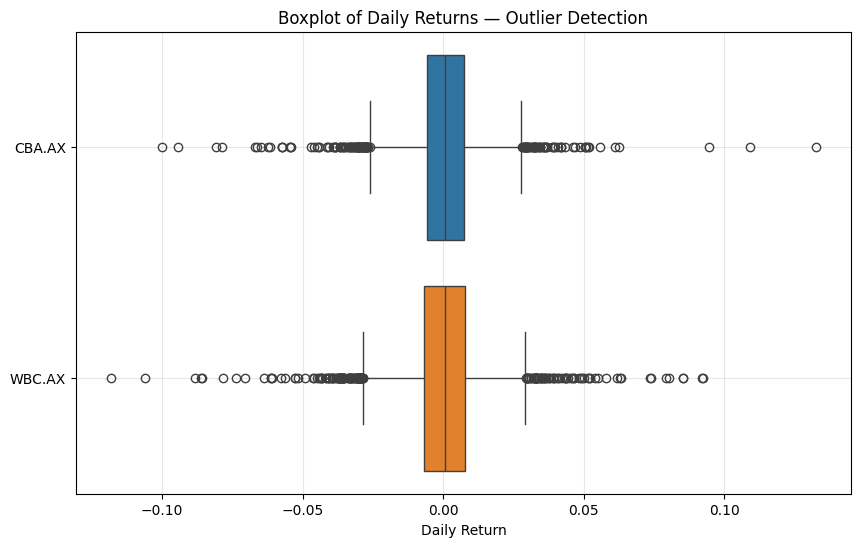

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=returns_df, orient="h")
plt.title("Boxplot of Daily Returns — Outlier Detection")
plt.xlabel("Daily Return")
plt.grid(alpha=0.3)
plt.show()
